## Baseline checks

Just checking everything works as it should

In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json




def get_df(field = "nodesolve"):
    cns = [0, 1]
    df = pd.DataFrame()
    for cn in cns:
        results_path = f"../bin/federated_outputs/results_{cn}.json"
        # path to the results file
        with open(results_path, "r") as f:
            data = json.load(f)
        for entry in data["client_train"]:
                round_num = entry["round"]
                for itr, loss_val in enumerate(entry[field]):
                    df = pd.concat([df, pd.DataFrame([{
                        "client": cn,
                        "round": round_num,
                        "itr": itr,
                        field: loss_val
                    }])], ignore_index=True)
    
    df["itr"] = df["itr"] + 1
    max_itr = df["itr"].max()
    df["itr"] = df["itr"] + (max_itr* df["round"])
    # keep only itr 1:3
    return df

    

# keep only itr 1:3
df = get_df("nodesolve")

FileNotFoundError: [Errno 2] No such file or directory: '../bin/federated_outputs/results_0.json'

In [ ]:
print(df[0:30])


    client  round  itr  nodesolve
0        0      0    1         20
1        0      0    2         56
2        0      0    3         44
3        0      0    4         32
4        0      0    5         38
5        0      0    6         32
6        0      0    7         32
7        0      0    8         26
8        0      0    9         26
9        0      0   10         26
10       0      0   11         26
11       0      0   12         26
12       0      0   13         26
13       0      0   14         26
14       0      1   15        170
15       0      1   16         50
16       0      1   17        260
17       0      1   18        362
18       0      1   19        320
19       0      1   20        548
20       0      1   21        464
21       0      1   22        590
22       0      1   23        458
23       0      1   24        860
24       0      1   25        500
25       0      1   26        296
26       0      1   27        248
27       0      1   28        218
28       0    

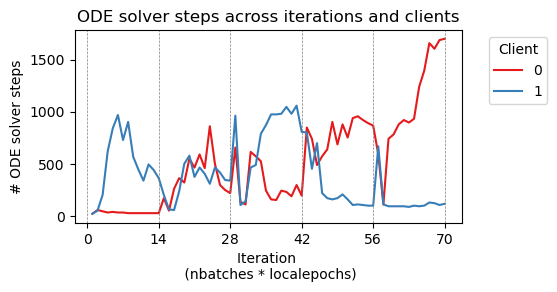

In [ ]:
# Plot Loss for making sure, y loss, x round, color client
plt.figure(figsize=(5, 2.5))
sns.lineplot(data=df, x="itr", y="nodesolve", hue="client", palette="Set1")

plt.legend(title="Client")
plt.legend(title="Client", bbox_to_anchor=(1.05, 1), loc='upper left')
# x integer not float ticks
plt.title("ODE solver steps across iterations and clients")
max_itr = df["itr"].max() // (df["round"].max()+1)
# plot rounds as vertical lines
for i in range(0, df["round"].max()+2):
    plt.axvline(x=(i*max_itr), color='gray', linestyle='--', linewidth=0.5)
    # add ticks
    plt.xticks(np.arange(0, df["itr"].max()+1, step=max_itr))


# y label 
plt.ylabel("# ODE solver steps")
# x label
plt.xlabel("Iteration \n (nbatches * localepochs)")
plt.show()

In [ ]:
# print the loss 
df_loss = get_df("loss")

In [113]:
df_loss

,client,round,itr,loss
0,0,0,1,53874.933594
1,0,0,2,6554.131836
2,0,1,3,3478.866455
3,0,1,4,3630.213379
4,0,2,5,5533.890625
5,0,2,6,5216.775879
6,0,3,7,9234.707031
7,0,3,8,5416.820801
8,0,4,9,5304.420410
9,0,4,10,3369.415283


Text(0.5, 1.0, 'Loss across iterations and clients')

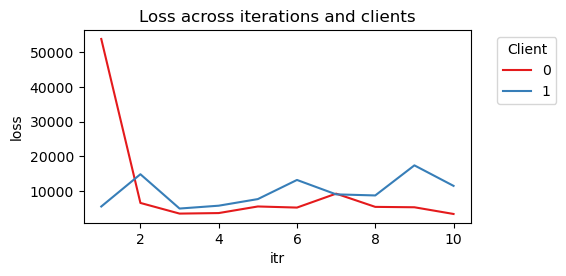

In [114]:
# Plotting
plt.figure(figsize=(5, 2.5))
sns.lineplot(data=df_loss, x="itr", y="loss", hue="client", palette="Set1")
plt.legend(title="Client")
plt.legend(title="Client", bbox_to_anchor=(1.05, 1), loc='upper left')
# x integer not float ticks
plt.title("Loss across iterations and clients")